# Machine learning (linear regression model)

# libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("real housing.csv")

In [3]:
data.shape

(545, 13)

In [4]:
data.head()

,price,area,bedrooms,bathrooms,storeroom,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,NaN


In [5]:
data = data.drop(columns=["prefarea","furnishingstatus"])

In [6]:
data.head()

,price,area,bedrooms,bathrooms,storeroom,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,0,0,0,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3
2,12250000,9960,3,2,2,1,0,1,0,0,2
3,12215000,7500,4,2,2,1,0,1,0,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2


In [53]:
data.describe()

,price,area,bedrooms,bathrooms,storeroom,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
print(data.nunique()) 

price              219
area               284
bedrooms             6
bathrooms            4
   storeroom         4
mainroad             2
guestroom            2
basement             2
hotwaterheating      2
airconditioning      2
parking              4
dtype: int64


In [8]:
features = ["area", "bedrooms","bathrooms", "parking","mainroad","guestroom","hotwaterheating","airconditioning"]
target = ["price"]

x = data[features]
y = data[target]

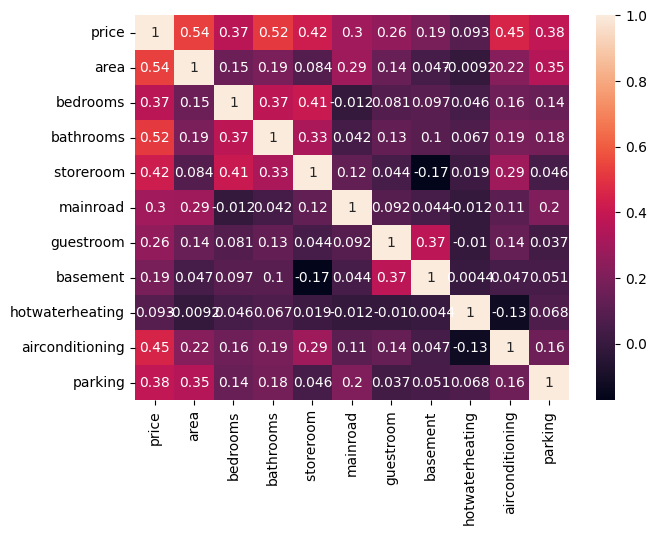

In [22]:

correlation_matrix = data.corr()
plt.figure(figsize=(7, 5))  
sns.heatmap(correlation_matrix, annot=True)
plt.show()


# data spliting

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.9, random_state=20)

# training the model

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_train,y_train)

LinearRegression()

In [49]:
print(model)
print(model.intercept_)

LinearRegression()
[-1514973.56004984]


In [50]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 1570349882984.512
R-Squared: 0.5267745224382965


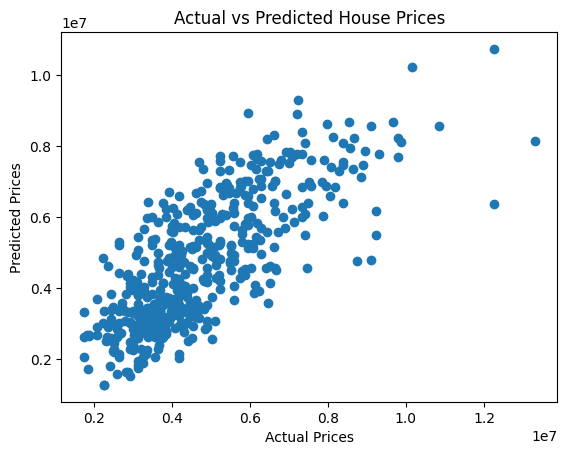

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


#  testing the model with new data

In [52]:
new_data_array = np.array([[7420,4,2,1,1,0,1,3],
                            [8960,4,2,1,1,0,1,3],  [3000,3,2,2,1,1,1,3]])

# Predict house prices
predictions = model.predict(new_data_array)

print("Predicted house prices:", predictions)

Predicted house prices: [[12976648.19247388]
 [13430773.37627739]
 [11947133.45891388]]


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")


Mean Absolute Error: 910385.3894061428
Mean Squared Error: 1458095844839.5574
Root Mean Squared Error: 1207516.3952673923
R-Squared: 0.6072159387821523
